In [359]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [360]:
df = pd.read_csv('data/mushroom.csv')



In [361]:
for col in df.columns:
    df[col] = df[col].str[1:]
df = df.replace({"'":""}, regex=True)
df.head(10)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


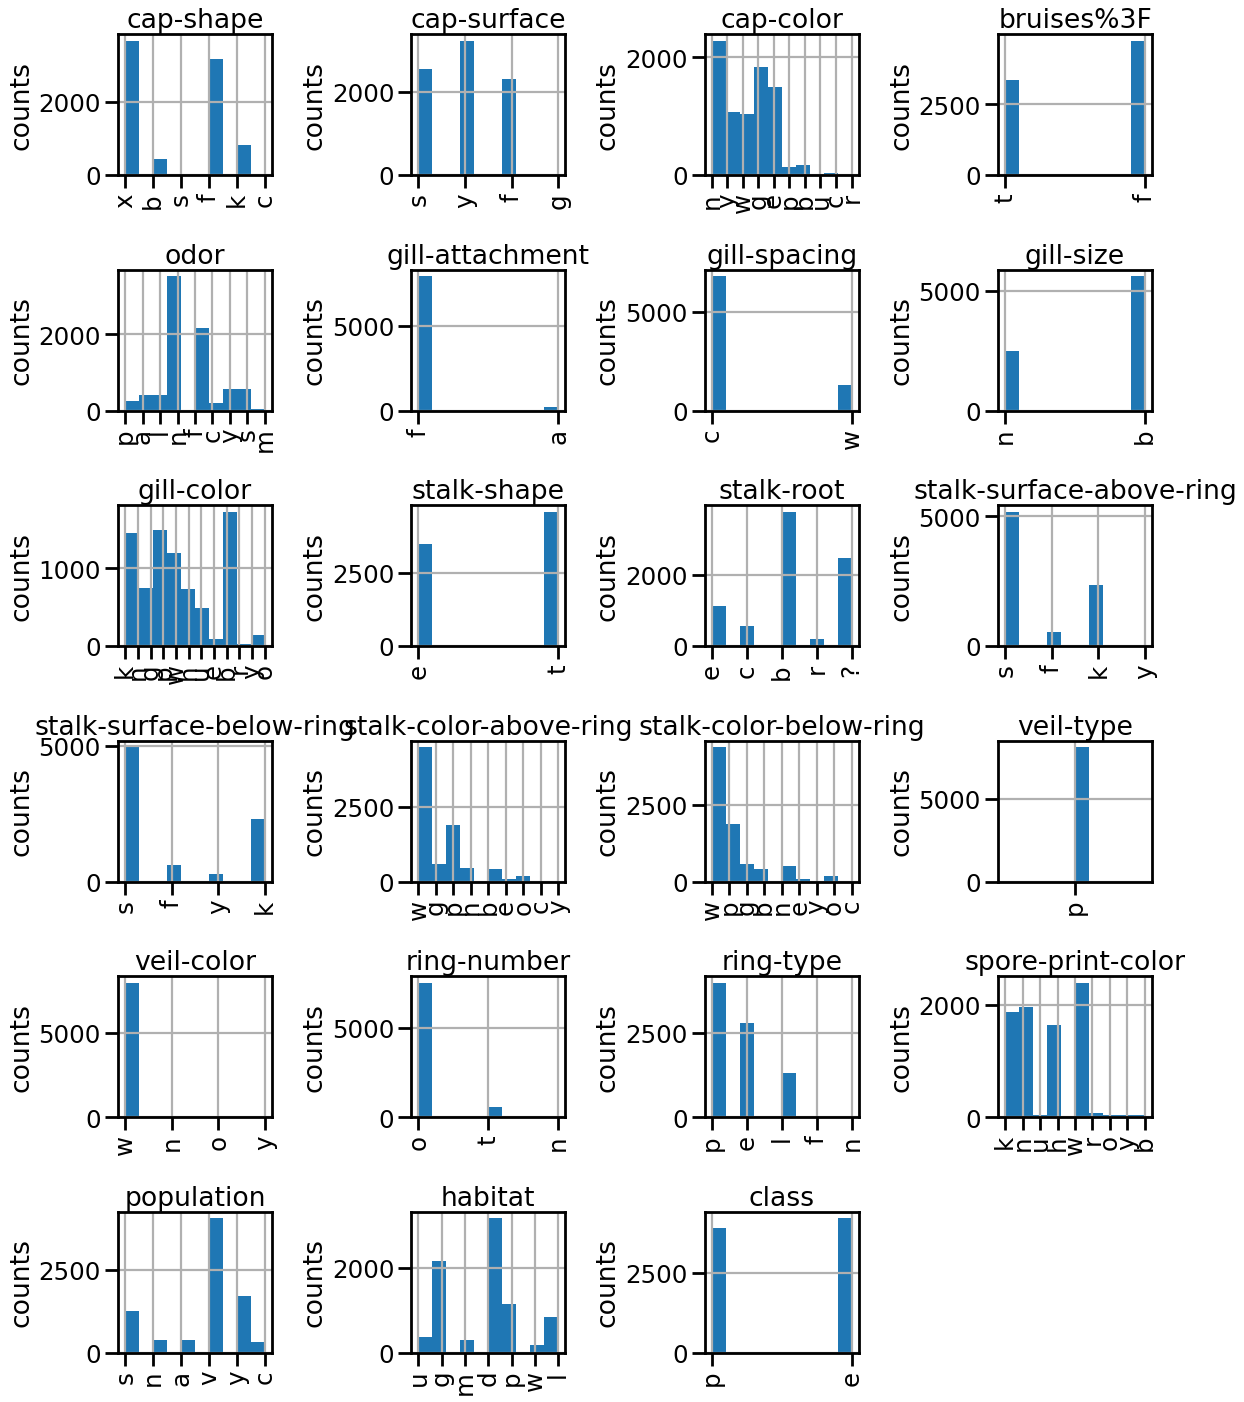

In [362]:
def show_distribution(dataframe):
  columnNames = list(dataframe)

  n = len(columnNames)

  row_count = 4

  plt.figure(figsize = (15, (n//row_count+1)*3), dpi = 80)
  for i in range(n):
      plt.subplot(n//row_count+1, row_count, i + 1)
      columnDf = dataframe.iloc[:, i]
      columnDf.hist()
      plt.ylabel('counts')
      plt.xticks(rotation = 90)
      plt.title(f'{columnNames[i]}')
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
  plt.show()

show_distribution(df)

In [363]:
def ohe(dataframe, cat_cols, cat_dictionary):
    df = dataframe.copy()
    for col in cat_cols:
        # Check if column is in the category dictionary
        
        # Get the list of categories for the column
        categories = cat_dictionary[col]
        
        # Create new column names for each category
        new_cols = [f"{col}_{c}" for c in categories]
        
        # One-hot encode the column
        one_hot = pd.get_dummies(df[col], prefix=col)
        
        # Add columns for any missing categories
        for c in new_cols:
            if c not in one_hot.columns:
                one_hot[c] = 0
        
        # Add the one-hot encoded columns to the dataframe
        df = pd.concat([df, one_hot], axis=1)
        
        # Drop the original column from the dataframe
        df.drop(columns=[col], inplace=True)
    
    return df



In [364]:
df_dict = df.to_dict(orient = 'list')
for key in df_dict.keys():
    df_dict[key] = list(set(df_dict[key]))

In [365]:
df_ohe = ohe(df, df.columns, df_dict)

In [366]:
df_ohe = df_ohe.drop("class_e", axis=1)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class_p
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764,-0.182567
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.018526
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003,0.163565
cap-shape_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784,-0.060664
cap-shape_x,-0.219564,-0.020077,-0.720235,-0.304733,-0.056884,1.000000,0.063511,-0.020077,-0.040634,-0.019137,...,-0.060421,0.044626,0.071773,0.023197,-0.096639,-0.004529,-0.029042,0.002845,-0.036493,-0.026886
cap-surface_f,-0.091638,-0.014032,0.064801,-0.158942,0.099464,0.063511,1.000000,-0.014032,-0.428362,-0.515479,...,-0.116485,0.210552,0.190756,0.080694,-0.191987,-0.122077,-0.086727,-0.011913,-0.098365,-0.195415
cap-surface_g,0.018820,0.249631,-0.006285,0.010863,-0.001396,-0.020077,-0.014032,1.000000,-0.015038,-0.018096,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-surface_s,0.117712,-0.015038,-0.093397,0.137988,-0.042607,-0.040634,-0.428362,-0.015038,1.000000,-0.552410,...,0.019574,-0.339696,-0.301670,0.123932,0.190799,0.077081,-0.039574,0.117548,0.062109,0.095454
cap-surface_y,-0.027947,0.015893,0.029076,0.015261,-0.051272,-0.019137,-0.515479,-0.018096,-0.552410,1.000000,...,0.089870,0.128418,0.110902,-0.191326,-0.006819,0.039697,0.117915,-0.100248,0.031986,0.088677


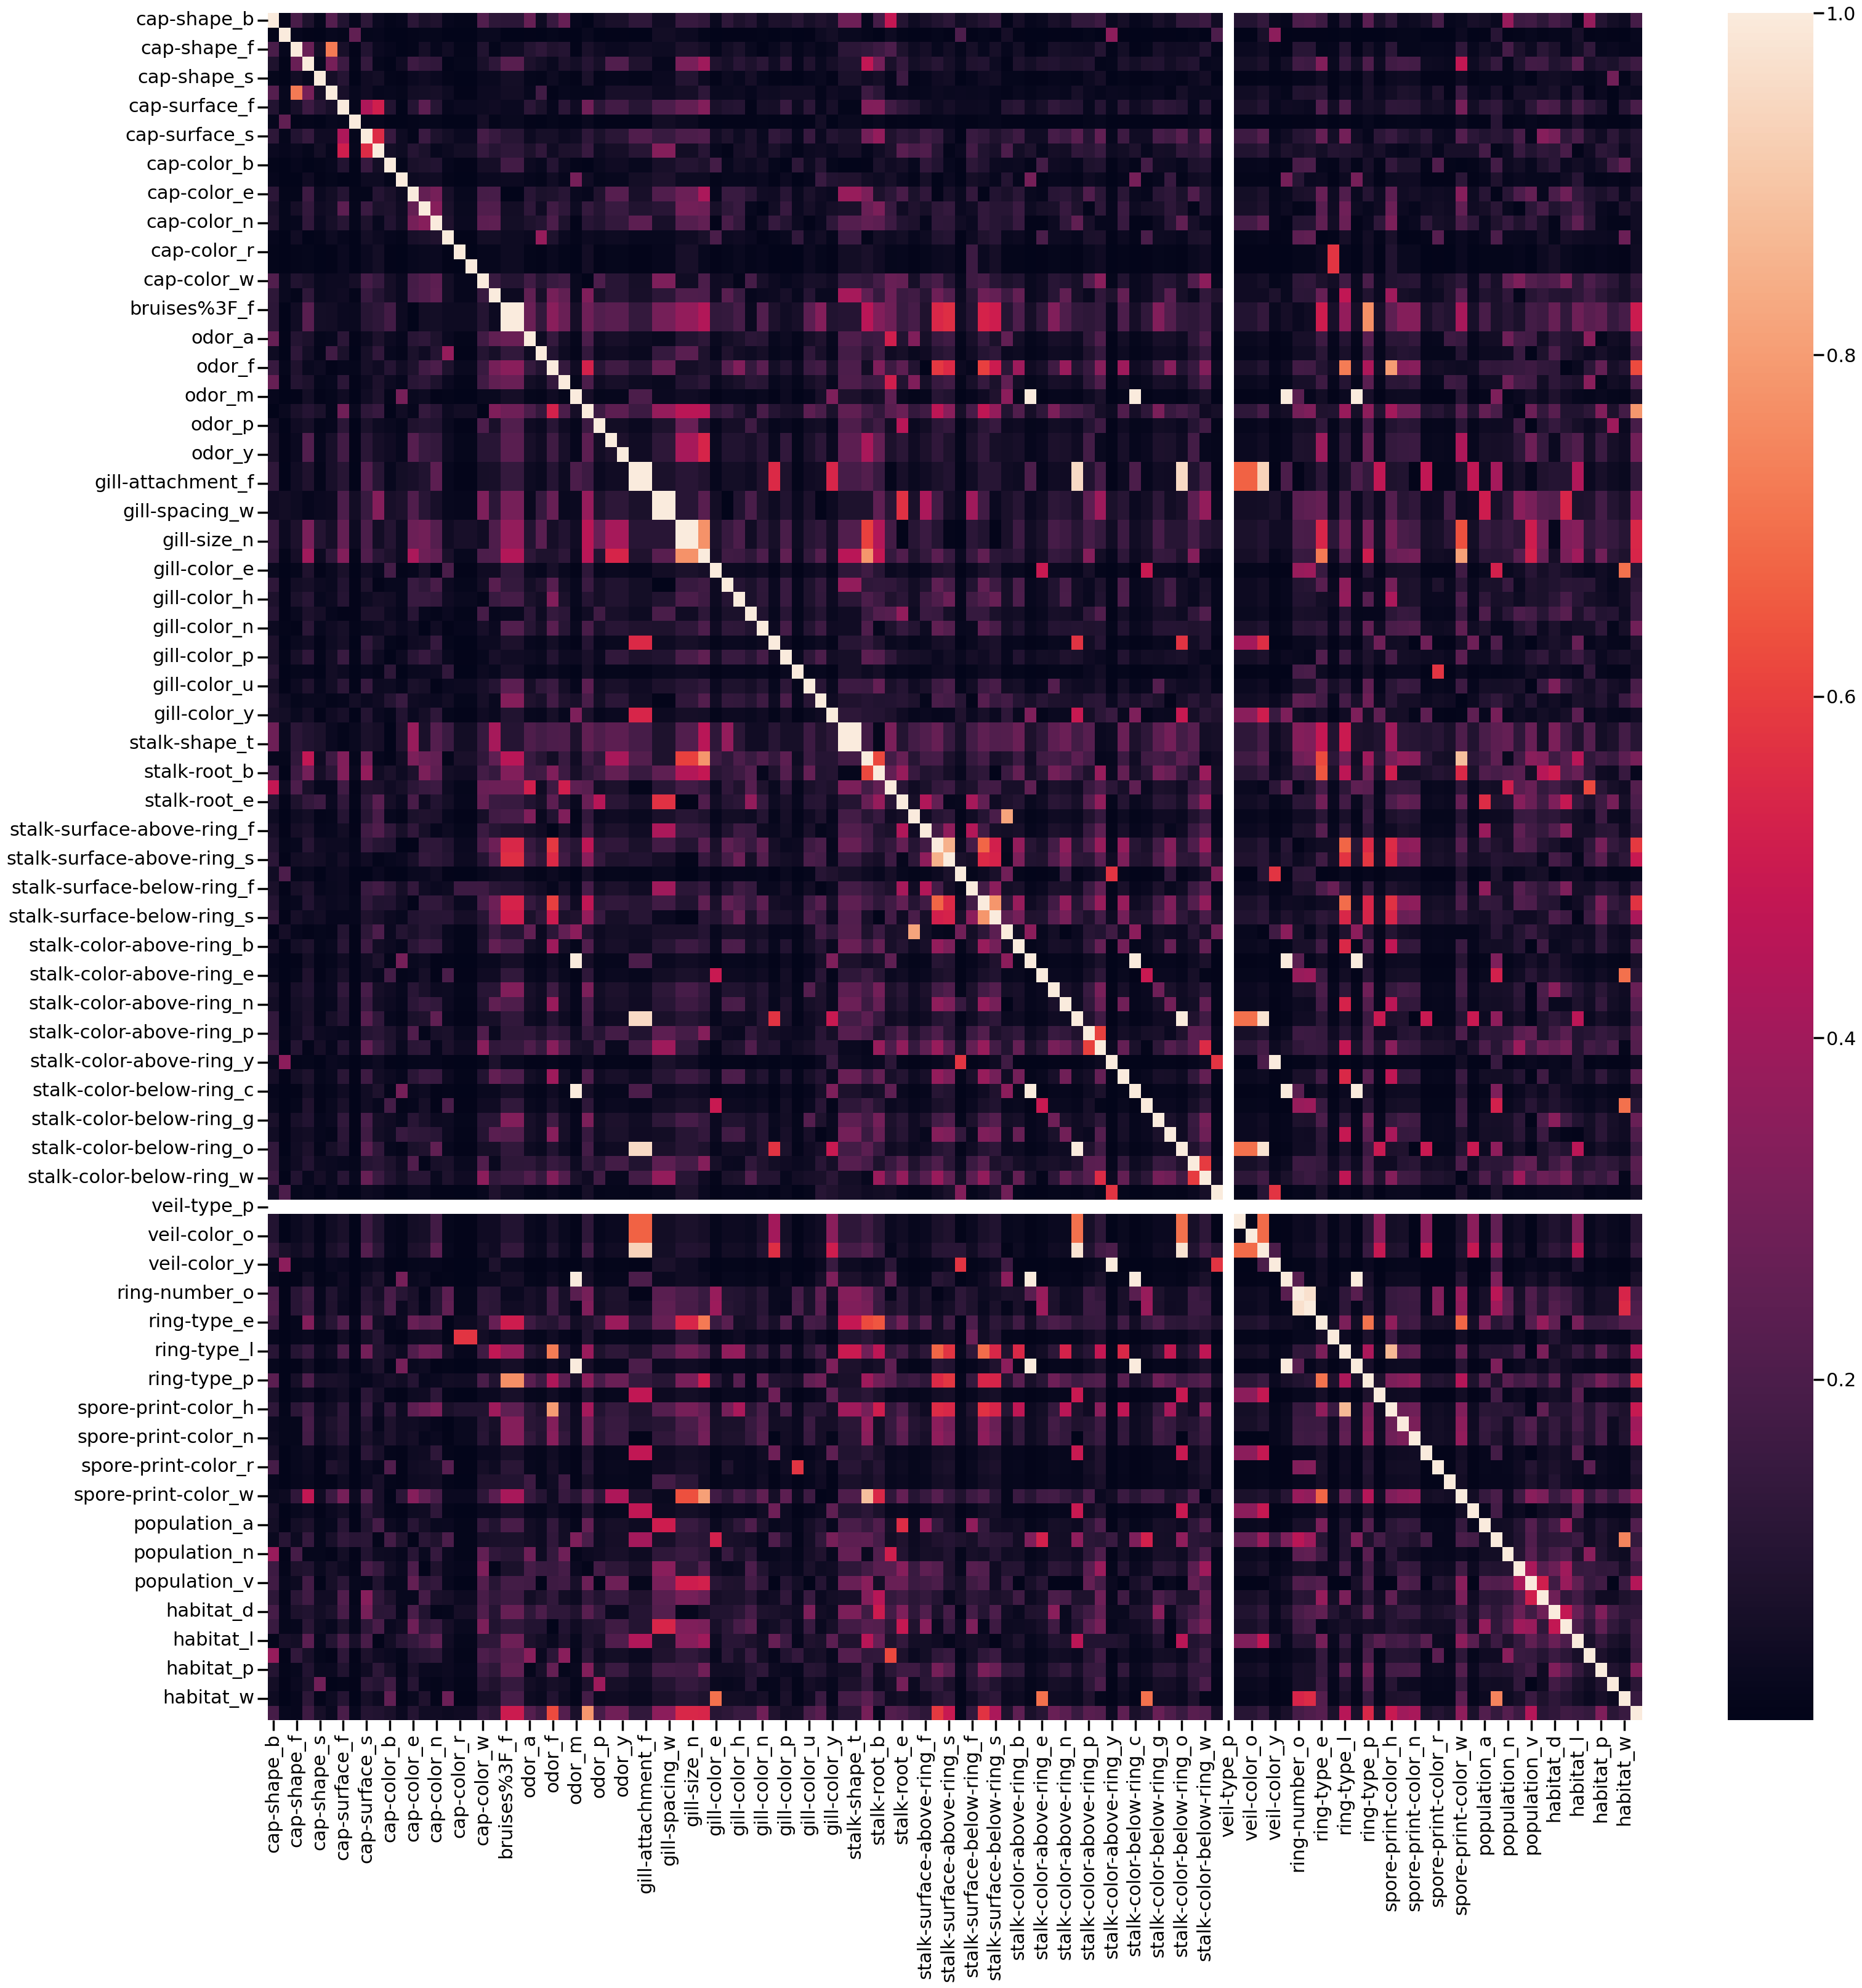

In [367]:
corr_matrix = df_ohe.corr()
fig, ax = plt.subplots(figsize = (36,36))
sns.heatmap(abs(corr_matrix))
pd.set_option('display.max_rows', None)


In [368]:
high_c = corr_matrix[abs(corr_matrix['class_p']) > 0.5]['class_p']
print(high_c)

bruises%3F_f                  0.501530
bruises%3F_t                 -0.501530
odor_f                        0.623842
odor_n                       -0.785557
gill-size_b                  -0.540024
gill-size_n                   0.540024
gill-color_b                  0.538808
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                  -0.540469
class_p                       1.000000
Name: class_p, dtype: float64


In [369]:
X = df_ohe
y = df_ohe.pop("class_p")

## Logisitc Regression 

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [371]:
train_acc =model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 1.0


In [372]:
###manually making confusion table from a different threshold
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [373]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
print(confusion_matrix(y_test,t_repredict(model, threshold, X_test)))
print(confusion_matrix(y_train,t_repredict(model, threshold, X_train)))

[[825   0]
 [  0 800]]
[[3383    0]
 [   0 3116]]


In [374]:
#making ROC curves for this model
from sklearn.metrics import roc_curve, auc

#name: name of your model to appear on the figure (can be arbitrary)
#clf: the model as you named it - will be used for getting the predictions
#ytest, xtest: your test data
#skip, labe: steps that control how many points you see in the ROC curve and how many labels are there

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM? (but double-check this pleaseee)
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    
    #this is the single value for the AUC score
    roc_auc = auc(fpr, tpr)
    
    if skip: 
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    
    #add labels to the curve
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

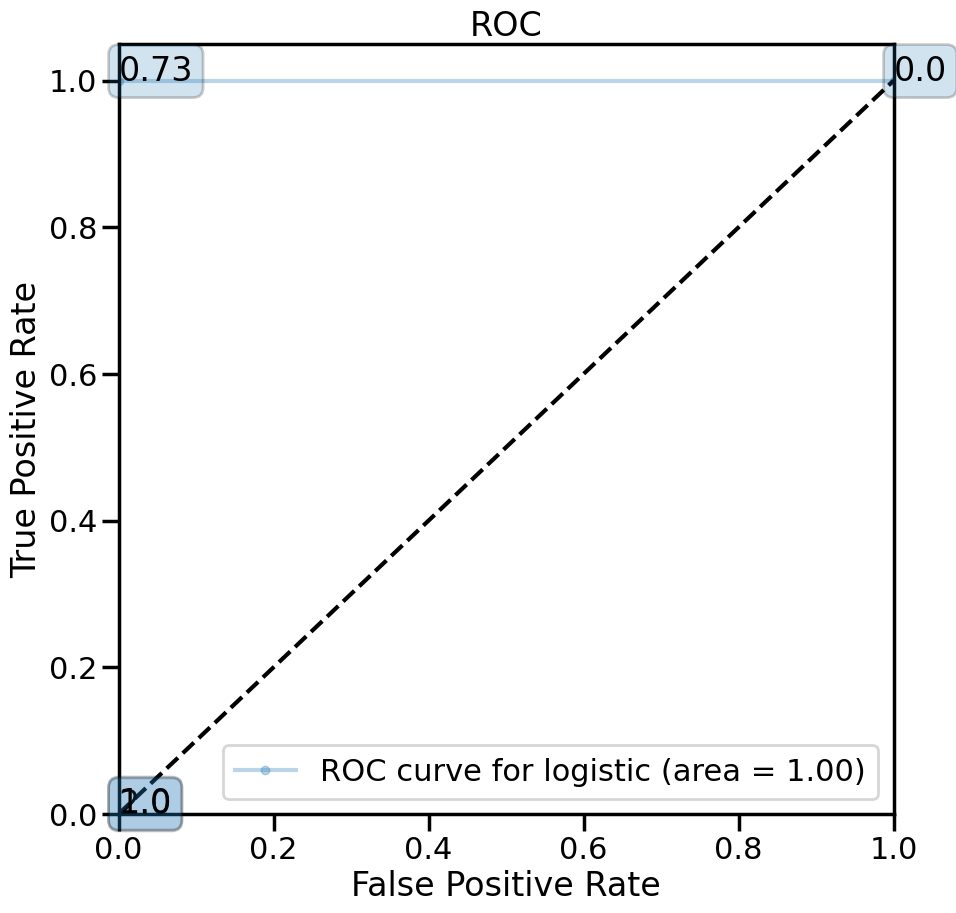

In [375]:
#This is how the above function should be used

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (10,10))
ax=make_roc("logistic",model, y_test, X_test, labe=1,  skip=0)
plt.show()

# Random Forest 


In [376]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

RFmodel = RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 10, 25],
    'max_depth': [None, 1, 5],
    'min_samples_split': [1, 2, 5]
}

grid_search = GridSearchCV(RFmodel, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best score:  0.9507583175445244


c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", li

In [377]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RFmodel = RandomForestClassifier(**grid_search.best_params_)


RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)

In [379]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [380]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [381]:
import time
start_time = time.time()
importances = RFmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFmodel.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.002 seconds


Text(0, 0.5, 'Mean decrease in impurity')

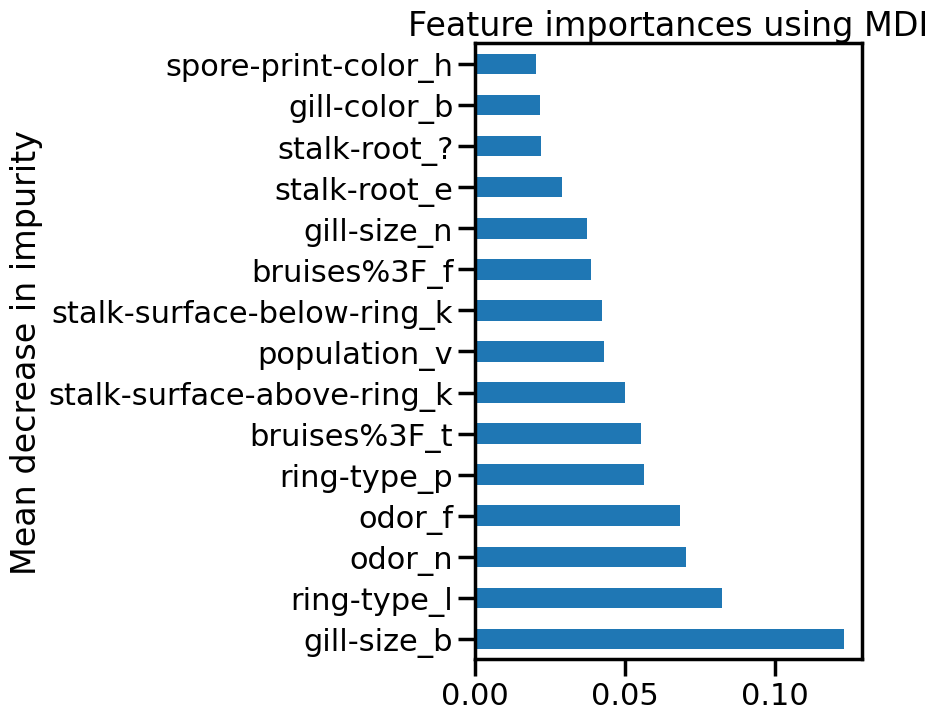

In [382]:
feature_names = [name for name in X.columns]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (5,8))
forest_importances.head(15).plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [383]:
feature_df = forest_importances.reset_index()
feature_df[['category', 'observation']] = feature_df['index'].str.split('_', n=1, expand=True)
feature_df = feature_df[['category', 'observation', 0]]
feature_df.columns = ['category', 'observation', 'value']


Text(0, 0.5, 'Mean decrease in impurity')

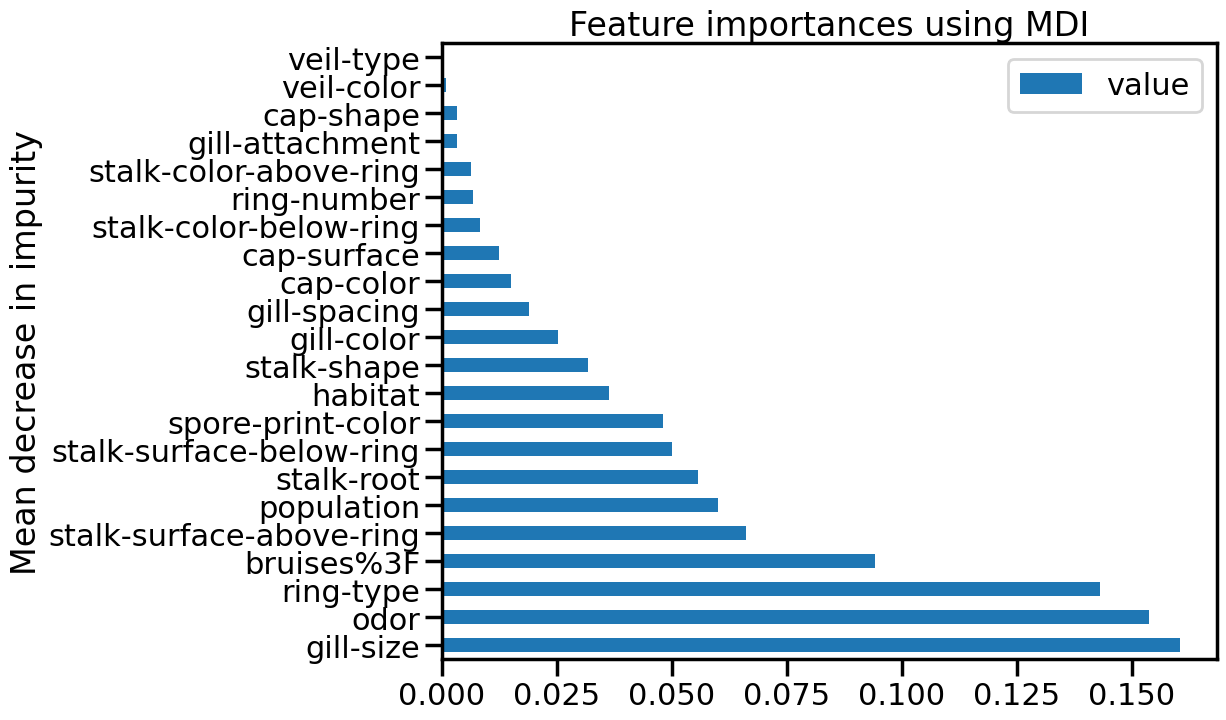

In [384]:
sorted_df = feature_df.groupby('category')['value'].sum().reset_index().sort_values('value', ascending=False)
sroted_df = sorted_df.set_index('category')
fig, ax = plt.subplots(figsize = (10,8))
sorted_df.plot.barh(x= 'category', y = 'value', ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")


In [385]:
sorted_df.set_index('category')

,value
category,
gill-size,0.160530
odor,0.153697
ring-type,0.143150
bruises%3F,0.094161
stalk-surface-above-ring,0.066130
population,0.059982
stalk-root,0.055651
stalk-surface-below-ring,0.050086
spore-print-color,0.048006


# KNN

In [386]:
from sklearn.neighbors import KNeighborsClassifier

n = 5
knn_model = KNeighborsClassifier(n_neighbors=n)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [387]:
train_acc = knn_model.score(X_train, y_train)
test_acc = knn_model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 1.0
Testing accuracy: 1.0


# Reduced logisitic regression


In [388]:
df_ohe = ohe(df, df.columns, df_dict)
X = df_ohe.loc[:,"odor_a":"odor_y"]
y = df_ohe["class_p"]

In [389]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1)

model = LogisticRegression(C=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [390]:
train_acc =model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 0.9852277390233894
Testing accuracy: 0.985239852398524


# Decision Tree Classifier

In [33]:
tree = DecisionTreeClassifier()

tree.fit(X=X_train,y=y_train)

y_pred_tree = tree.predict(X_test)


In [34]:
tree_train_acc =tree.score(X_train, y_train)
tree_test_acc = tree.score(X_test, y_test)

print("Training accuracy:", tree_train_acc)
print("Testing accuracy:", tree_test_acc)

Training accuracy: 1.0
Testing accuracy: 1.0


# PCA Analysis and Dimensionality Reduction

There are so many features for classifying mushrooms. If we wish to fit the dataset to new models, it may be smart to reduce the dimensionality of the dataset. We also do this to ensure that we avoid overfitting, and the curse of dimensionality. We have decided to use a PCA model on the dataset, as will follow:

In [162]:
pca = PCA()
X_PCA = pca.fit_transform(X_train)

We first want to determine how many principal components we wish to use. We can do this by plotting the variance porportions of each principal component. 

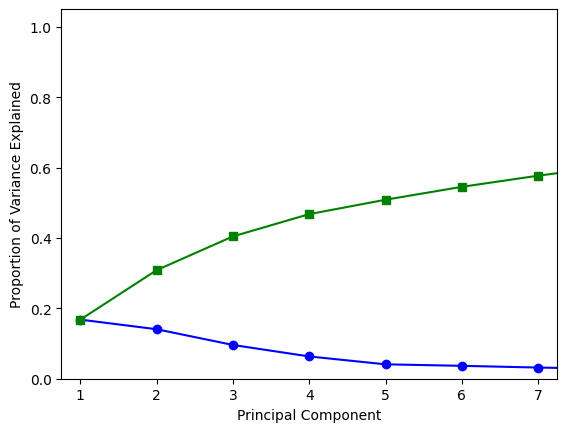

In [163]:
var_ratio = pca.explained_variance_ratio_
plt.plot(list(range(1, len(var_ratio) + 1)), var_ratio, '-o', color="blue", label='Individual component')
plt.plot(list(range(1, len(var_ratio) + 1)), np.cumsum(var_ratio), '-s', label='Cumulative', color="green")


plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,7.25)
plt.ylim(0,1.05)
plt.xticks(list(range(1, 8)))
plt.show()

The first 2 principal components hold about 35% of the variance, and may therefore be suitable for us to keep. 

In [191]:
pca = PCA(n_components = 3)
data_pca = pca.fit_transform(X_train)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])

In [194]:
import plotly.express as px
x_plot = np.array(data_pca)[:,0]
y_plot = np.array(data_pca)[:,1]
fig = px.scatter(x=x_plot,y = y_plot, color = y_train)
fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Poisonous"
)
fig.show()


The figure above depics the first principal component plotted against the second. Here we can see some distinct clusters, within the positive values and the negative values, indicating that there may be a clear distinction with our selected components. We can test the accuracy of our PCA model by using a K-nearest neighbors classifier.

In [196]:
from sklearn.neighbors import KNeighborsClassifier

data_pca_test = pca.fit_transform(X_test)
data_pca_test = pd.DataFrame(data_pca_test,columns=['PC1','PC2','PC3'])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_pca,y_train)
training_acc = knn.score(data_pca,y_train)
testing_acc = knn.score(data_pca_test,y_test)

print("PCA model with 3 principal components")
print(f"Nearest Neighbor Classifier Training accuracy: {training_acc}")
print(f"Nearest Neighbor Classifier Testing accuracy: {testing_acc}")

PCA model with 3 principal components
Nearest Neighbor Classifier Training accuracy: 0.9973842129558393
Nearest Neighbor Classifier Testing accuracy: 0.9107692307692308


# Ethical Considerations

There are many ethical implications of uasing machine learning on such a dataset. Sure, our model was able to correctly classify all of our instances, though we must consider if this is enough data for us to completely trust the model. There are of course repurcussions for blindly trusting such a model. In our case, if one were to consume a wrongly classified mushroom, this may result in death. For instance if our model overfits on this dataset, and we make new discoveries which the model is not able to classify correctly. Or if certain features are not available to us, and the model misclassifies an instance. From our data, we also discovered that the biggest factor in classifying poisnous mushrooms is the smell with 98% accuracy. Would it be smart to perhaps completely go off the smell of the mushrooms to determine if they are safe to consume? The biggest ethical concern of course, is if the model can cause harm to any individuals who have access to it. In our case, the misuse of the model can cause death. Therefore it is important for us to understand why our model behaves in the way it does, and it is important for us to perform exploratory data analysis on our models, so we may comprehend the effectiveness of the model. This not only applies to our specific problem, but bringing these ethical considerations into the real world, where machine learning is ubiquitous in our daily lives. 